In [7]:
!pip install opencv-python
!pip install scikit-image

  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1


In [2]:
import numpy as np 

import matplotlib.pyplot as plt
import glob
import cv2
import tensorflow as tf
import os
import random 
from tqdm import tqdm 
from skimage.io import imread, imshow
from skimage.transform import resize


In [2]:
IMAGE_LIB = 'Tumor/'
MASK_LIB = 'Mask/'

SEED=42
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

In [49]:
a=(os.listdir("Tumor/"))

In [36]:
seed = 42
np.random.seed = seed

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

IMAGE_LIB = r'Tumor/'
MASK_LIB = r'Mask/'

train_ids = os.listdir(IMAGE_LIB)
mask_ids = os.listdir(MASK_LIB)



In [37]:
len(train_ids)

51

In [41]:
len(mask_ids)

51

In [42]:
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):   
    path = IMAGE_LIB 
    img = imread(path  + id_ )[:,:,:IMG_CHANNELS]  
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img  #Fill empty X_train with values from img
    


Resizing training images and masks


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:02<00:00, 21.04it/s]


In [46]:
mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(mask_ids), total=len(mask_ids)):   
    path = MASK_LIB 
    mask = imread(path  + id_ )
    
    mask = np.expand_dims(resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
                                  preserve_range=True), axis=-1)
    Y_train[n] = mask  #Fill empty X_train with values from img


Resizing training images and masks


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:01<00:00, 45.19it/s]


In [53]:
X_train.shape

(51, 128, 128, 3)

In [51]:
Y_train.shape

(51, 128, 128, 1)

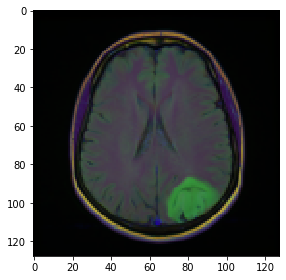

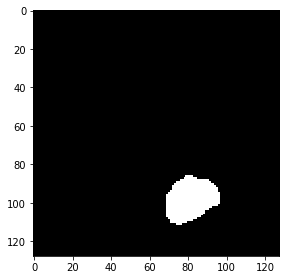

In [50]:
image_x = random.randint(0, len(train_ids))
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()


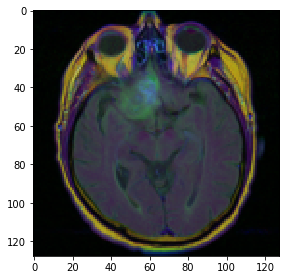

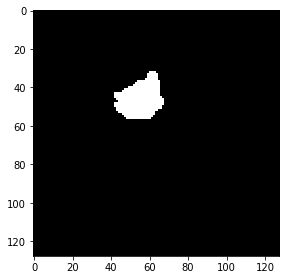

In [55]:
image_x = random.randint(0, len(train_ids))
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()


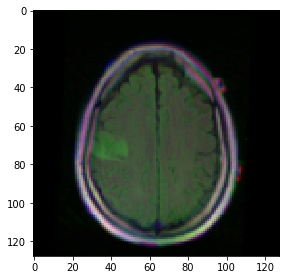

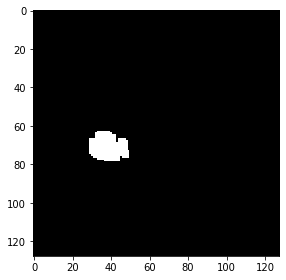

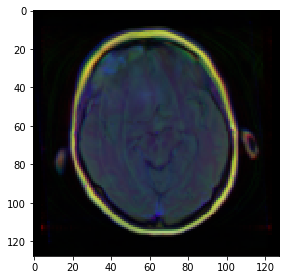

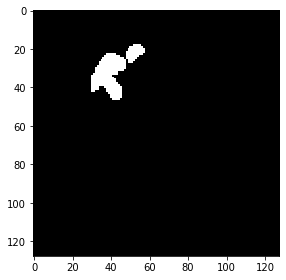

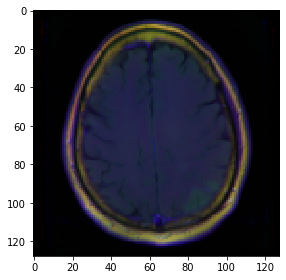

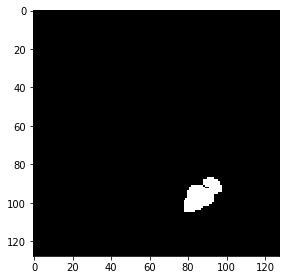

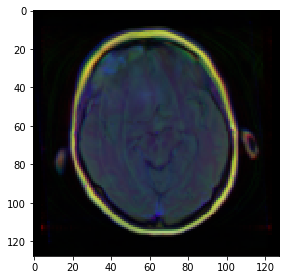

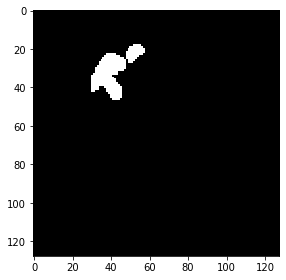

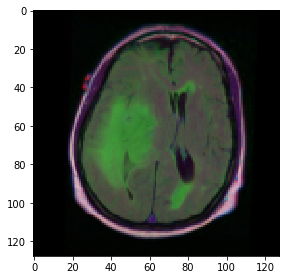

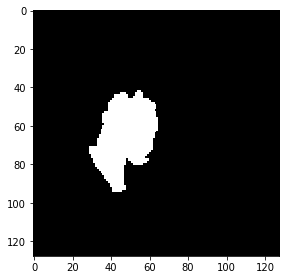

In [56]:
for i in range (5):
    image_x = random.randint(0, len(train_ids))
    imshow(X_train[image_x])
    plt.show()
    imshow(np.squeeze(Y_train[image_x]))
    plt.show()

In [58]:
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128, 128, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 128, 128, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 128, 128, 16) 0           conv2d_19[0][0]                  
____________________________________________________________________________________________

In [71]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('brain_tumor.h5', verbose=1, save_best_only=True)

callbacks = [tf.keras.callbacks.TensorBoard(log_dir='logs')]



In [74]:
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=8, epochs=200, callbacks=callbacks)

Epoch 1/200
6/6 [==============================] - 4s 584ms/step - loss: 0.0954 - accuracy: 0.9736 - val_loss: 0.0969 - val_accuracy: 0.9720
Epoch 2/200
6/6 [==============================] - 3s 537ms/step - loss: 0.0957 - accuracy: 0.9730 - val_loss: 0.1019 - val_accuracy: 0.9714
Epoch 3/200
6/6 [==============================] - 4s 599ms/step - loss: 0.0867 - accuracy: 0.9739 - val_loss: 0.0829 - val_accuracy: 0.9743
Epoch 4/200
6/6 [==============================] - 3s 555ms/step - loss: 0.0796 - accuracy: 0.9726 - val_loss: 0.0739 - val_accuracy: 0.9771
Epoch 5/200
6/6 [==============================] - 3s 541ms/step - loss: 0.0797 - accuracy: 0.9739 - val_loss: 0.0845 - val_accuracy: 0.9741
Epoch 6/200
6/6 [==============================] - 3s 571ms/step - loss: 0.0750 - accuracy: 0.9746 - val_loss: 0.0838 - val_accuracy: 0.9734
Epoch 7/200
6/6 [==============================] - 3s 556ms/step - loss: 0.0736 - accuracy: 0.9751 - val_loss: 0.0895 - val_accuracy: 0.9731
Epoch 8/200
6

Epoch 59/200
6/6 [==============================] - 3s 530ms/step - loss: 0.0390 - accuracy: 0.9854 - val_loss: 0.1005 - val_accuracy: 0.9788
Epoch 60/200
6/6 [==============================] - 3s 534ms/step - loss: 0.0362 - accuracy: 0.9862 - val_loss: 0.1002 - val_accuracy: 0.9805
Epoch 61/200
6/6 [==============================] - 3s 528ms/step - loss: 0.0345 - accuracy: 0.9870 - val_loss: 0.1053 - val_accuracy: 0.9785
Epoch 62/200
6/6 [==============================] - 3s 530ms/step - loss: 0.0366 - accuracy: 0.9863 - val_loss: 0.0865 - val_accuracy: 0.9818
Epoch 63/200
6/6 [==============================] - 3s 531ms/step - loss: 0.0358 - accuracy: 0.9865 - val_loss: 0.1116 - val_accuracy: 0.9807
Epoch 64/200
6/6 [==============================] - 3s 534ms/step - loss: 0.0331 - accuracy: 0.9875 - val_loss: 0.1023 - val_accuracy: 0.9821
Epoch 65/200
6/6 [==============================] - 3s 530ms/step - loss: 0.0317 - accuracy: 0.9878 - val_loss: 0.1037 - val_accuracy: 0.9828
Epoch 

6/6 [==============================] - 4s 741ms/step - loss: 0.0150 - accuracy: 0.9938 - val_loss: 0.1949 - val_accuracy: 0.9802
Epoch 117/200
6/6 [==============================] - 4s 682ms/step - loss: 0.0151 - accuracy: 0.9937 - val_loss: 0.2044 - val_accuracy: 0.9806
Epoch 118/200
6/6 [==============================] - 4s 677ms/step - loss: 0.0144 - accuracy: 0.9940 - val_loss: 0.1884 - val_accuracy: 0.9811
Epoch 119/200
6/6 [==============================] - 3s 521ms/step - loss: 0.0142 - accuracy: 0.9942 - val_loss: 0.1723 - val_accuracy: 0.9797
Epoch 120/200
6/6 [==============================] - 3s 524ms/step - loss: 0.0141 - accuracy: 0.9942 - val_loss: 0.1869 - val_accuracy: 0.9803
Epoch 121/200
6/6 [==============================] - 3s 553ms/step - loss: 0.0142 - accuracy: 0.9940 - val_loss: 0.1939 - val_accuracy: 0.9804
Epoch 122/200
6/6 [==============================] - 4s 685ms/step - loss: 0.0139 - accuracy: 0.9942 - val_loss: 0.1936 - val_accuracy: 0.9812
Epoch 123/200

6/6 [==============================] - 4s 590ms/step - loss: 0.0102 - accuracy: 0.9957 - val_loss: 0.2620 - val_accuracy: 0.9800
Epoch 174/200
6/6 [==============================] - 3s 582ms/step - loss: 0.0100 - accuracy: 0.9958 - val_loss: 0.2098 - val_accuracy: 0.9804
Epoch 175/200
6/6 [==============================] - 3s 577ms/step - loss: 0.0099 - accuracy: 0.9959 - val_loss: 0.2480 - val_accuracy: 0.9792
Epoch 176/200
6/6 [==============================] - 4s 585ms/step - loss: 0.0103 - accuracy: 0.9957 - val_loss: 0.2557 - val_accuracy: 0.9791
Epoch 177/200
6/6 [==============================] - 4s 592ms/step - loss: 0.0100 - accuracy: 0.9958 - val_loss: 0.2639 - val_accuracy: 0.9799
Epoch 178/200
6/6 [==============================] - 4s 597ms/step - loss: 0.0099 - accuracy: 0.9959 - val_loss: 0.2880 - val_accuracy: 0.9802
Epoch 179/200
6/6 [==============================] - 3s 579ms/step - loss: 0.0096 - accuracy: 0.9960 - val_loss: 0.2631 - val_accuracy: 0.9796
Epoch 180/200

In [75]:
idx = random.randint(0, len(X_train))


preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)



1/1 [==============================] - 0s 997us/step


In [76]:
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)



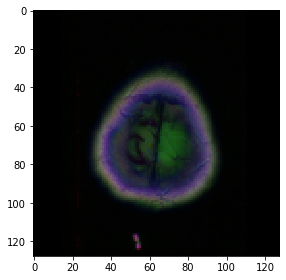

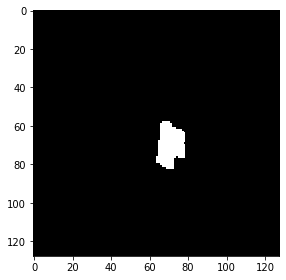

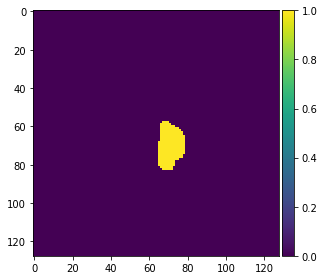

In [77]:
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

In [78]:
model.save('brain_tumor.h5')